In [74]:
import xarray as xr
import matplotlib.pyplot as plt
df = xr.open_dataset("data2.nc")
df

<xarray.Dataset>
Dimensions:        (value: 5, component: 3, params: 1, space: 51, time: 1071)
Coordinates:
  * value          (value) object 'marginal' 'average' '1.01' '1' '0'
  * component      (component) object 'death' 'gdp' 'hospitalization'
  * params         (params) object 'baseline'
  * space          (space) object 'Alabama' 'Alaska' ... 'District of Columbia'
  * time           (time) datetime64[ns] 2019-10-15 2019-10-16 ... 2022-09-19
Data variables:
    VV_1_pcstv     (params, component, space, value, time) float64 ...
    VV_1_pctv      (params, component, value, time) float64 ...
    VV_1_ptv       (params, value, time) float64 ...
    epsilon_ptv    (params, value, time) float64 ...
    epsilon_pctv   (params, component, value, time) float64 ...
    epsilon_pcstv  (params, component, space, value, time) float64 ...
    VV_1_pstv      (params, space, value, time) float64 ...
Attributes:
    title:    vaccine value disaggregated by parameter, time, space, component

In [75]:
df["VV_1_pctv"].loc[{"value": "0", "params": "baseline"}].values

array([[    0.        ,     0.        ,     0.        , ...,
        27456.68496628, 27465.63087792, 27474.57678956],
       [    0.        ,     0.        ,     0.        , ...,
         8911.54251984,  8916.05370605,  8920.52666188],
       [    0.        ,     0.        ,     0.        , ...,
          453.88267857,   454.39114278,   454.89960699]])

Text(0.5, 0, 'Time')

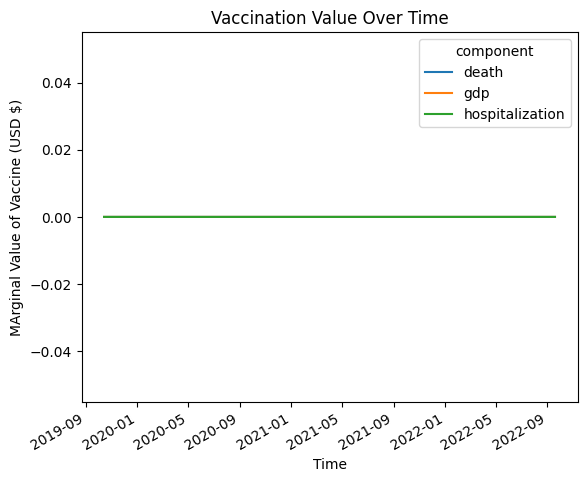

In [86]:
fig=df["VV_1_pctv"].loc[{"value": "marginal", "params": "baseline"}].plot.line(x="time")
plt.title("Vaccination Value Over Time")
fig[1].axes.set_ylabel("MArginal Value of Vaccine (USD $)")
fig[1].axes.set_xlabel("Time")

AttributeError: 'BarContainer' object has no attribute 'set_title'

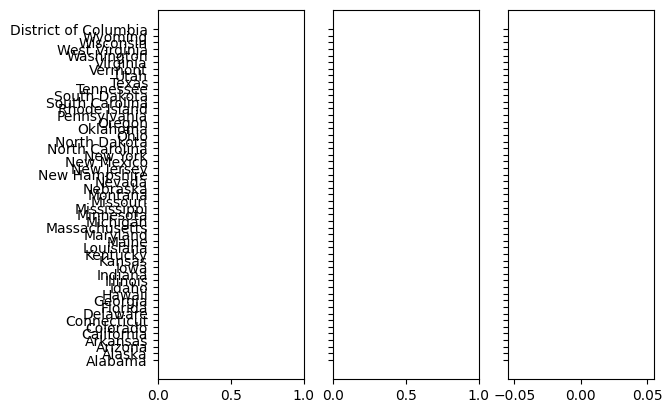

In [89]:
fig, axes = plt.subplots(1,3, sharey=True)
for index, component in enumerate(df["component"]):
    axes[index]=plt.barh(
        df["space"],
        df["VV_1_pcstv"].loc[
            {"value": "marginal", "params": "baseline", "time": df["time"][-1], "component": component}
        ].values
    )
    axes[index].set_title(component)
fig.tight_layout(pad=0.5)
fig.set_figheight(9)
plt.title("Final Vaccine Value per State")